<h1 align="center">
    <img alt="Animi Motus AI Logo" src="images\logo.png" width="400" height="400">
    <br />
    Den Loob - 01.01.1970
</h1>

<hr />

<div dir="rtl">
    <h2 align="center"><u>מטרת המחקר</u></h2>
    <div align="center">
    מטרת המחקר בשם Animi Motus* לעזור לאנשים עם הפרעות בזיהוי הבעות פנים. דוגמאות להפרעות כאלה הן 
    <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2737612/#b43">הפרעה דכאונית קשה</a>,
    <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2737612/#b32">סכיזופרניה</a>,
    ו<a href="https://doi.org/10.1016/j.psychres.2011.12.042">אישיות נרקיסיסטית</a>.
    </div>
</div>

\* משמעות של *"Animi Motus"* הינה *"רגשות"* בלטינית

<hr />

<div dir="rtl">
    <h2 align="center"><u>תיאור הנתונים</u></h2>

מאגר הנתונים ששומש במחקר זה נמצא באתר
<a href="https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset">kaggle</a>
תחת הקישור המצורף לשם האתר. מאגר נתונים זה הוכן על ידי
<a href="https://jonathanoheix.github.io/">
Jonathan Oheix
</a>,
<a href="https://github.com/nakulsingh1289">
Nakul Singh
</a>
ו<a href="http://happyai.epizy.com/">Sagnik Roy</a>
וכולל סך הכל 28821 תמונות לאימון ו7066 תמונות לאימות.

</div>

<hr />
<h2 align="center"><u>חקר נתונים</u></h2>
<div dir="rtl">יבוא ספריות לחקר נתונים</div>

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<div dir="rtl">מציאת כמות תמונות בכל אחת מהתיקיות בעזרת לולאת for שמירתם בdataframe ובניית גרף עמודות לפי כמותם</div>

In [2]:

all_emotion_types = sorted(os.listdir("dataset/train/"))
epc = { # emotion_picture_count
    "type": [], # train or validation
    "emotion": [], # angry, sad, happy and etc
    "count": [], # int
    
}
# fill epc (emotion_picture_count) with `emotion_name: emotion_pictures_count`
for emotion_type in all_emotion_types:
    train_emotion_len = len(os.listdir("dataset/train/"+emotion_type))
    validation_emotion_len = len(os.listdir("dataset/validation/"+emotion_type))
    
    epc["type"].append("train")
    epc["emotion"].append(emotion_type)
    epc["count"].append(train_emotion_len)
    
    epc["type"].append("validation")
    epc["emotion"].append(emotion_type)
    epc["count"].append(validation_emotion_len)
    
emotion_count_df = pd.DataFrame(epc).sort_values("type")
emotion_count_df.reset_index(drop=True, inplace=True)
emotion_count_df

,type,emotion,count
0,train,angry,3993
1,train,disgust,436
2,train,fear,4103
3,train,happy,7164
4,train,neutral,4982
5,train,sad,4938
6,train,surprise,3205
7,validation,angry,960
8,validation,disgust,111
9,validation,fear,1018


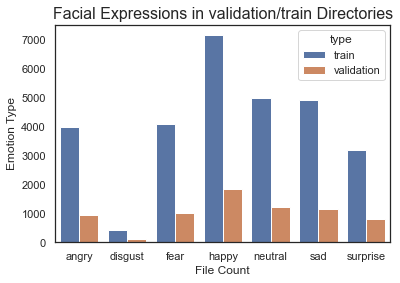

In [3]:
sns.set(style="white")
sns.barplot(x="emotion", y="count", hue="type", data=emotion_count_df)
plt.title("Facial Expressions in validation/train Directories", fontsize=16)
plt.xlabel("File Count")
plt.ylabel("Emotion Type")
plt.show()

<div dir="rtl">בעזרת ספריית random חישוב של path של 16 תמונות אקראיות מהתיקיית train והצגתם</div>

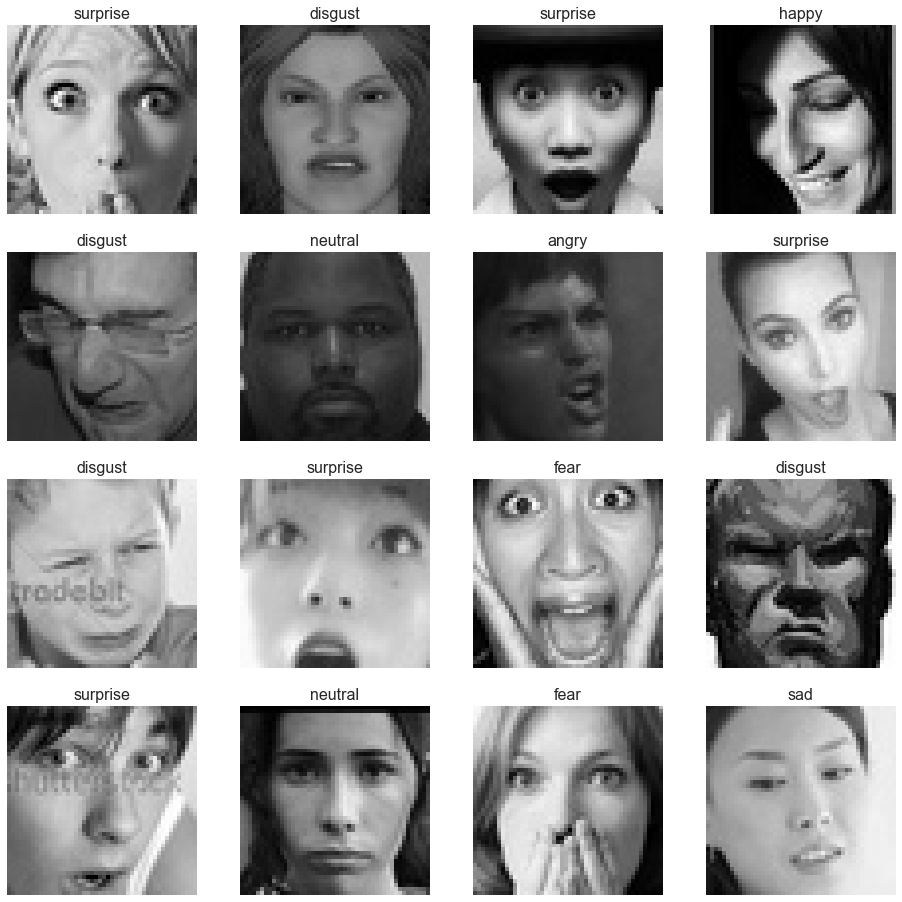

In [4]:
import random
get_random_child_file_path = lambda parent_path: os.path.join(parent_path, random.choice(os.listdir(parent_path)))

f, axarr = plt.subplots(4, 4, figsize=(16, 16))
r, c = 0, 0

for i in range(16):
    if (i % 4 == 0 and i != 0):
        r += 1
        c = 0
    emotion = get_random_child_file_path("dataset\\train\\")
    img = cv2.imread(get_random_child_file_path(emotion))
    axarr[r, c].imshow(img)
    axarr[r, c].set_title(os.path.basename(emotion), fontsize=16)
    axarr[r, c].axis('off')
    c += 1
plt.show()

<hr />
<h2 align="center"><u>למידת מכונה</u></h2>

<div dir="rtl">יבוא ספריות ללמידת מכונה</div>

In [5]:
import mediapipe as mp

<div dir="rtl">הצהרת פונקציות לזיהוי פנים וויזואליזציתם של הנקודות וחלקים של הפנים</div>

In [6]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh
def find_face(image):
    with mp_face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        min_detection_confidence=0.5) as face_mesh:
        
        results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    return results
def draw_landmarks(image, landmarks):
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=landmarks,
        connections=mp_face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_tesselation_style())
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=landmarks,
        connections=mp_face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
    return image

<div dir="rtl">מציאת תמונה אקראית והצגתה עם וללא ויזואליזציה של חלקים מהפנים</div>

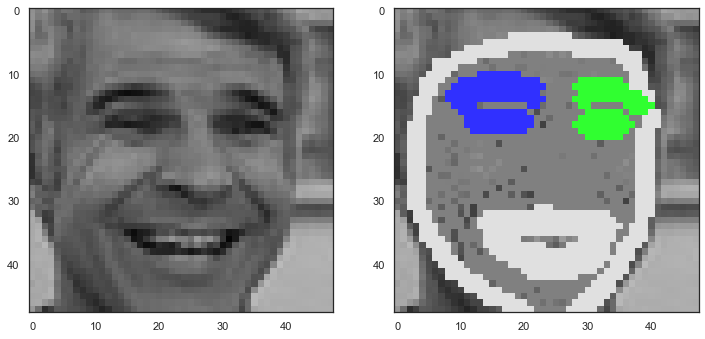

In [7]:
get_random_child_file_path = lambda parent_path: os.path.join(parent_path, random.choice(os.listdir(parent_path)))
path = get_random_child_file_path(get_random_child_file_path("dataset\\train\\"))
image = cv2.imread(path)
multi_face_landmarks = find_face(image).multi_face_landmarks
if not multi_face_landmarks:
    plt.imshow(image)
    raise Exception(f"no face found {path}")
face_landmarks = multi_face_landmarks[0]
annotated_image = image.copy()
draw_landmarks(annotated_image, face_landmarks)

      
_, axarr = plt.subplots(1, 2, figsize=(12, 12))
axarr[0].imshow(image)
axarr[1].imshow(annotated_image)
plt.show()

<div dir="rtl">הדפסת הנקודות שהוצגו לעיל כקואורדינטות על התמונה</div>

In [8]:
landmarks_dict = {
    "x": [],
    "y": [],
    "z": [],
}
for lm in face_landmarks.landmark:
    landmarks_dict['x'].append(lm.x)
    landmarks_dict['y'].append(lm.y)
    landmarks_dict['z'].append(lm.z)
pd.DataFrame(landmarks_dict)

,x,y,z
0,0.544041,0.694410,-0.109703
1,0.572504,0.582392,-0.207897
2,0.553765,0.617986,-0.120362
3,0.529686,0.466495,-0.158932
4,0.574379,0.545771,-0.218155
...,...,...,...
463,0.606442,0.388144,0.044430
464,0.593569,0.395114,0.017828
465,0.589781,0.399625,-0.011764
466,0.752989,0.386136,0.092019


<h3 align="center"><u>Generating a CSV File of Landmarks</u></h3>

<div dir="rtl">יבוא ספריות לבניית קובץ csv אשר ישמש ללמידת מכונה</div>

In [9]:
import csv
from collections import deque

<div dir="rtl">בניית קובץ csv בעזרת לולאת for ופונקציות שהוגדרו לעיל, ושמירת התוצאות בקובץ.</div>

In [10]:
face_not_found_dict = {}
for data_usage_type in ['train', 'validation']:
    if os.path.exists(f"{data_usage_type}_landmarks.csv"):
        print(f"{data_usage_type}_landmarks.csv exists, continuing to the next data usage type...")
        continue
    face_not_found_dict[data_usage_type] = face_not_found = deque()
    with open(f'{data_usage_type}_landmarks.csv', 'w') as f:
        writer = csv.writer(f)
        
        header=['emotion']+["xyz"[i%3]+str(j) for i, j in zip(range(468*3), [k for k in range(468) for _ in range(3)])] # 468 rows * 3 columns
        # header looks like: [emotion, x0, y0, z0, x1, y1, ..., z467]
        
        writer.writerow(header)
        
        # for each emotion
        for e_i, e_type in enumerate(all_emotion_types):
            path = f"dataset/{data_usage_type}/{e_type}/"
            all_image_names = os.listdir(path)
            print(f"working on {data_usage_type}/{e_type}")
            # for each image of this emotion type
            for image_name in all_image_names:
                image_path = path+image_name
                image = cv2.imread(image_path)
                
                multi_face_landmarks = find_face(image).multi_face_landmarks
                # if no face found, add to list
                if not multi_face_landmarks:
                    face_not_found.append(image_path)
                    continue
                y = [i.y for i in multi_face_landmarks[0].landmark]
                x = [i.x for i in multi_face_landmarks[0].landmark]
                z = [i.z for i in multi_face_landmarks[0].landmark]
                
                data = np.array(list(zip(x, y, z))).reshape(-1)
                data = np.concatenate(([e_i],data))
                writer.writerow(data)
                
    print(f"Done {data_usage_type}. {len(face_not_found)=}")
print("Done")
            
        
        
        
    
    

train_landmarks.csv exists, continuing to the next data usage type...
validation_landmarks.csv exists, continuing to the next data usage type...
Done


<div dir="rtl">שמירת שמות של הקבצים עם פנים שלא זיוהתו.</div>

In [11]:
for data_usage_type in ["train", "validation"]:
    
    if data_usage_type not in face_not_found_dict:
        print(f"{data_usage_type} is not in face_not_found_dict, continuing to the next data usage type...")
        continue
    if os.path.exists(f"{data_usage_type}_no_face_found.csv"):
        print(f"{data_usage_type}_no_face_found.csv exists, continuing to the next data usage type...")
        continue
    
    with open(f"{data_usage_type}_no_face_found.csv", "w") as f:
        writer = csv.writer(f)
        writer.writerow(face_not_found_dict[data_usage_type])
print("Done!")

train is not in face_not_found_dict, continuing to the next data usage type...
validation is not in face_not_found_dict, continuing to the next data usage type...
Done!


<div dir="rtl">טעינת הdataset והדפסה של חמש שורות הראשונות שלו</div>

In [12]:
train_df = pd.read_csv('train_landmarks.csv')
test_df = pd.read_csv('validation_landmarks.csv')

In [13]:
train_df.head()

,emotion,x0,y0,z0,x1,y1,z1,x2,y2,z2,...,z464,x465,y465,z465,x466,y466,z466,x467,y467,z467
0,0.0,0.531052,0.766528,-0.066078,0.590875,0.653876,-0.152624,0.539522,0.676948,-0.071534,...,0.019166,0.574877,0.426415,-0.009140,0.690913,0.378875,0.146359,0.702611,0.372493,0.153546
1,0.0,0.489051,0.754891,-0.103594,0.459130,0.616146,-0.195686,0.473762,0.653929,-0.107277,...,0.001024,0.510184,0.410119,-0.025311,0.705920,0.354981,0.023032,0.725784,0.337364,0.022208
2,0.0,0.513394,0.768508,-0.140086,0.520900,0.619091,-0.249280,0.518641,0.663883,-0.138140,...,0.009991,0.587300,0.424491,-0.025031,0.820161,0.407064,0.068830,0.841950,0.397191,0.070206
3,0.0,0.471052,0.694842,-0.110672,0.477409,0.570939,-0.185398,0.478078,0.607723,-0.098481,...,-0.000122,0.560386,0.398199,-0.024131,0.759891,0.375499,0.032051,0.781655,0.363766,0.031378
4,0.0,0.496296,0.749524,-0.041758,0.488255,0.687777,-0.176013,0.492631,0.700287,-0.075950,...,-0.064295,0.552662,0.455754,-0.083548,0.749166,0.400290,-0.037998,0.767254,0.384250,-0.039437


<h3 align="center"><u>Training KNN model</u></h3>

<div dir="rtl">יבוא ספריות ללמידת מכונה</div>

In [14]:
from sklearn.neighbors import KNeighborsClassifier
import pickle

<div dir="rtl">חלוקת הנתונים לקלט ופלט רצוי</div>

In [15]:
X_train = train_df.loc[:, train_df.columns != 'emotion'].values
y_train = train_df['emotion'].values

In [16]:
X_test = train_df.loc[:, train_df.columns != 'emotion'].values
y_test = train_df['emotion'].values

<div dir="rtl">אימון המודל עם היפרפרמטר k בטווח בין 1 ל-53</div>

In [17]:
k_neighbors_test_df = pd.DataFrame({"k": [], "accuracy": []})
min_k, max_k, step = 1, 53, 2
print("calculating...")
print("[", end="")
for k in range(min_k, max_k+step, step):
    test_knn = KNeighborsClassifier(n_neighbors=k)
    test_knn.fit(X_train, y_train)
    print("▯",end="")
    accuracy = test_knn.score(X_test, y_test)
    print("▮",end="")
    
    k_neighbors_test_df = k_neighbors_test_df.append(
        {"k": k, "accuracy": accuracy}, ignore_index=True
    )
print("]")
k_neighbors_test_df


calculating...
[▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮▯▮]


,k,accuracy
0,1.0,0.997670
1,3.0,0.653966
2,5.0,0.596814
3,7.0,0.559952
4,9.0,0.536505
5,11.0,0.523616
6,13.0,0.512494
7,15.0,0.504828
8,17.0,0.494721
9,19.0,0.488934


<div dir="rtl">ויזואליזציה של דיוק המודל עם היפרפרמטרים k שונים</div>

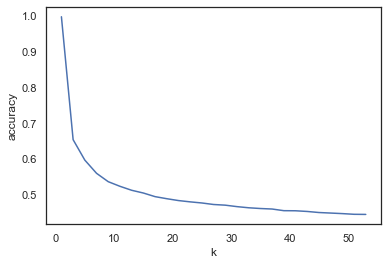

In [18]:
sns.lineplot(data=k_neighbors_test_df, x="k", y="accuracy")
plt.show()

<div dir="rtl">
    הגרף שקיבלנו מאוד דומה למינוס פונקציה לוגריתמית, כלומר, *y=-log(x).
</div>

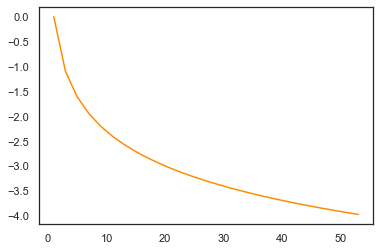

In [19]:
import math

k_values = k_neighbors_test_df["k"].values
plt.plot(k_values, [-math.log(k) for k in k_values], c="darkorange")
plt.show()

<div dir="rtl">
ואם נשחק קצת עם המספרים נקבל:
</div>

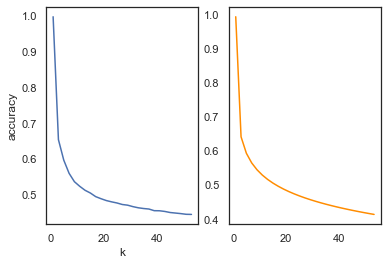

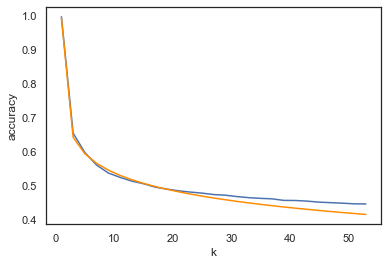

In [20]:


k_values = k_neighbors_test_df["k"].values

_, axarr = plt.subplots(1, 2)
sns.lineplot(data=k_neighbors_test_df, x="k", y="accuracy", ax=axarr[0])
axarr[1].plot(k_values, [-0.07*math.log(1.52*k-1.5)+0.72 for k in k_values], c="darkorange")
plt.show()

sns.lineplot(data=k_neighbors_test_df, x="k", y="accuracy")
plt.plot(k_values, [-0.07*math.log(1.52*k-1.5)+0.72 for k in k_values], c="darkorange")
plt.show()


<div dir="rtl">
כמו שניתן לראות פונקציה זו תרד בירידה לוגריתמית ולכן נבחר בערך k הנמוך ביותר, k=1
</div>

In [21]:
KNN = None
if os.path.exists("animi_motus.ai"):
    with open("animi_motus.ai", "rb") as f:
        KNN = pickle.load(f)
else:
    KNN = KNeighborsClassifier(n_neighbors=1)
    KNN.fit(X_train, y_train)

<div dir="rtl">שמירת המודל בקובץ</div>

In [22]:
if not os.path.exists("animi_motus.ai"):
    with open("animi_motus.ai", "wb") as f:
        pickle.dump(KNN, f)

<h3 align="center"><u>Testing the KNN model</u></h3>

<div dir="rtl">יבוא ספריות לבדיקת המודל</div>

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

<div dir="rtl">חישוב הדיוק וויזואליזציה של בדיקת המודל</div>

In [24]:
print("Accuracy: ", KNN.score(X_test, y_test))

Accuracy:  0.9976703115018976


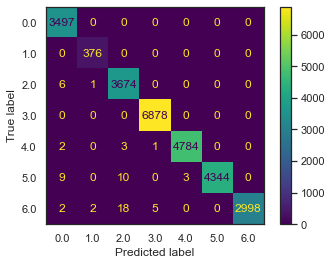

In [25]:
ConfusionMatrixDisplay.from_estimator(KNN, X_test, y_test)
plt.show()

<div dir="rtl">כדי לבדוק האם המודל יעבוד גם עם תמונות בחיים האמיתיים, צילמתי 4 תמונות ובדקתי האם המודל יזהר את הבעת הפנים שלי, וספוילר.. הוא זיהה את כולם!</div>

In [26]:
irl_test = ["happy", "surprise", "neutral", "fear"]
def predict(image):
    multi_face_landmarks = find_face(image).multi_face_landmarks
    if not multi_face_landmarks:
        return -1
    y = [i.y for i in multi_face_landmarks[0].landmark]
    x = [i.x for i in multi_face_landmarks[0].landmark]
    z = [i.z for i in multi_face_landmarks[0].landmark]

    X = np.array(list(zip(x, y, z))).reshape(-1)
    return all_emotion_types[int(KNN.predict([X])[0])]
for file_name in irl_test:
    print(f"actual: {file_name}, predicted: " + predict(cv2.imread(f"irl_test/{file_name}.jpg")))


actual: happy, predicted: happy
actual: surprise, predicted: surprise
actual: neutral, predicted: neutral
actual: fear, predicted: fear


<div dir="rtl">בנוסף היה לי מעניין לדעת איך אחוזי הדיוק משפיעים בk אחר, כמו k=3</div>

In [27]:
KNN3 = KNeighborsClassifier(n_neighbors=3)
KNN3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
def predict3(image):
    multi_face_landmarks = find_face(image).multi_face_landmarks
    if not multi_face_landmarks:
        return -1
    y = [i.y for i in multi_face_landmarks[0].landmark]
    x = [i.x for i in multi_face_landmarks[0].landmark]
    z = [i.z for i in multi_face_landmarks[0].landmark]

    X = np.array(list(zip(x, y, z))).reshape(-1)
    return all_emotion_types[int(KNN3.predict([X])[0])]

In [29]:
print("Test Data Accuracy: ", KNN3.score(X_test, y_test))
print("irl_image_test: \n")
for file_name in irl_test:
    print(f"actual: {file_name}, predicted: " + predict3(cv2.imread(f"irl_test/{file_name}.jpg")))

Test Data Accuracy:  0.6539661067899147
irl_image_test: 

actual: happy, predicted: disgust
actual: surprise, predicted: surprise
actual: neutral, predicted: neutral
actual: fear, predicted: neutral


<hr />
<h2 align="center"><u>סיכום</u></h2>

<div dir="rtl">
    בהתחלה הנתונים שמצאתי היו נתונים גולמיים (raw data), חסרי משמעות ולא היה ניתן להשתמש בהם ללמידת מכונה זו ולכן העברתי אותם לקובץ csv מאיפה היה עכשיו אפשר לטעון אותם לdata frame ולהשתמש בהם באלגוריתם שכן קרוב.
    <br />
    בעזרת אלגוריתם שכן קרוב בניתי את הוקטורים של נקודות הציון של כל אחד מהפנים המעובדים בתוך הdata frame, אך כדאי לדעת באיזה כמות שכנים להשתמש (k) הייתי צריך למצוא מהו הk שכנים עם דיוק הטוב ביותר לכן בניתי לולאת for אשר בודקת את כל האפשרויות בטווח מ-1 עד 55 וגיליתי שבמקרה הזה k הטוב ביותר, כלומר, k עם דיוק הגבוה ביותר הוא אחד.
    <br />
    בסוף המחקר בדקתי את המודל שיצרתי והוא סיווג נכון יותר מ 99 אחוז מהבעות פנים של בני אדם שבחיים לא "ראה" אותם ובנוסף לכך, גם זיהה את הבעות פנים שלי.


</div>

<hr />
<h2 align="center"><u>רפלקציה</u></h2>

<div dir="rtl">
    נהניתי מהפרויקט ומהמחקר הזה מכיוון שהנושא מאוד מעניין אותי והיה מאוד כיף ומהנה ללמוד עוד על ענף הטכנולוגי הזה. 
    <br />
    למדתי יותר על גרפים, KNN, פונקציות לוגריתמיות ואפילו על מחלות והפרעות כמו סכיזופרניה ואישיות נרקיסיסטית.
    <br />
    גיליתי שאלגוריתם שכן קרוב (KNN) עובד על ידי שמירה של וקטורים בזמן הלמידה ואז מציאה של שכנים של וקטורים הקרובים ביותר לנקודה שאותה אנו מנסים לסווג, לפי מספר שכנים קבוע שבחרנו.
    הבנתי לעומק איך לסדר לבנות ולהשתמש בקבצים csv ולשלוט עליהם בעזרת ספריה pandas.
    הבנתי מה עוברים אנשים עם הפרעות כמו סכיזופרניה ונרקיסיסטיות, באיזה בעיות נתקלים ביום יום ואיך מזהים הבעות פנים.
    למדתי איך לחקור ולבדוק את המודל בעזרת נוסחאות וטבלאות כמו Confusion matrix, true ו-false positives ו-negatives, accuracy, precision, recall ו-F1 ואיך לחשב אותם.
    <br>
    אני מאוד שמח שבחרתי בנושא הזה ומקווה מאוד שהפרויקט שלי יעזור לאנשים עם הפרעות שהוזכרו לעיל.
    
</div>